<a href="https://colab.research.google.com/github/Vidzhel/data-analysis/blob/main/Lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Vidzhel/data-analysis/main/USA_Housing.csv', sep=',')

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


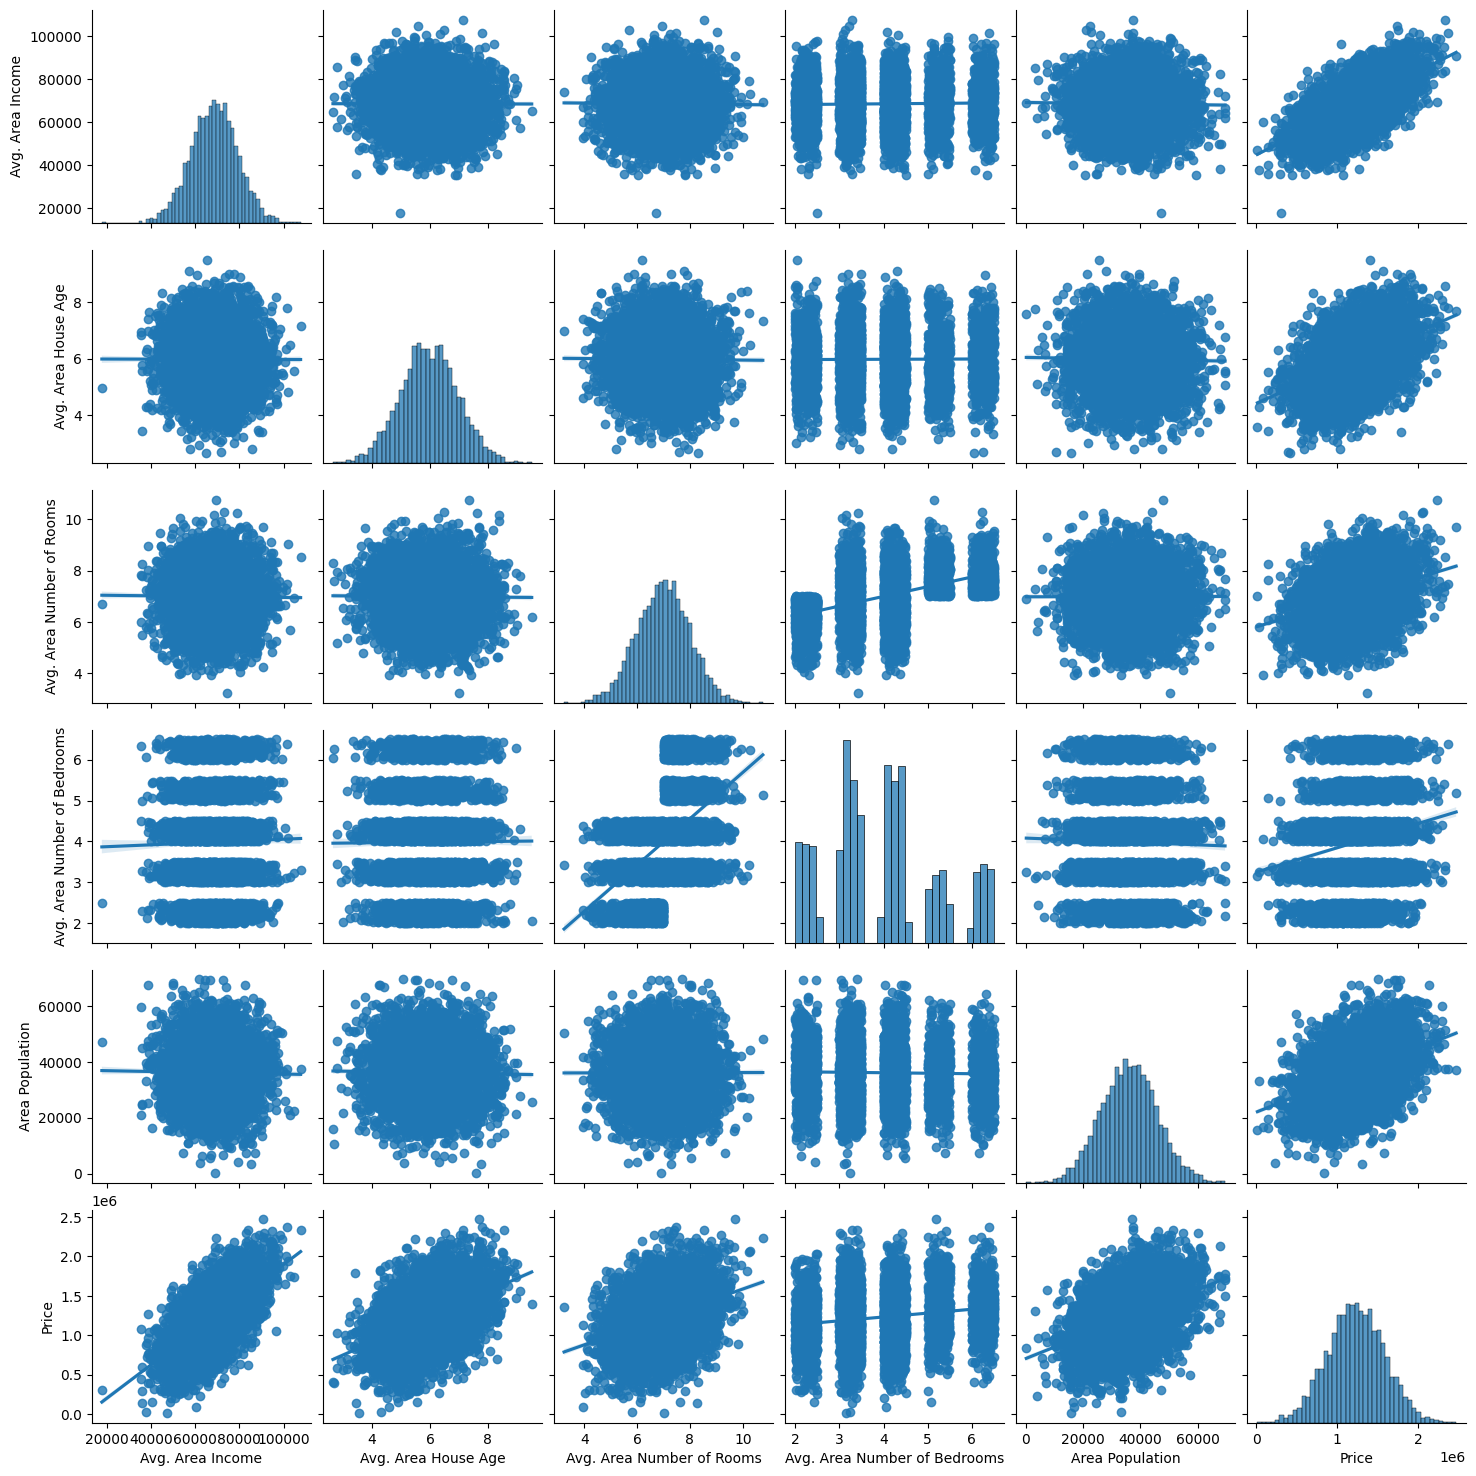

In [7]:
sns.pairplot(df, kind='reg')

На графіках хоч якусь кореляцію видно хіба що в залежності ціни від середнього доходу або ж кількості спальних в залежності від кількості кімнат (оце так несподіванка)

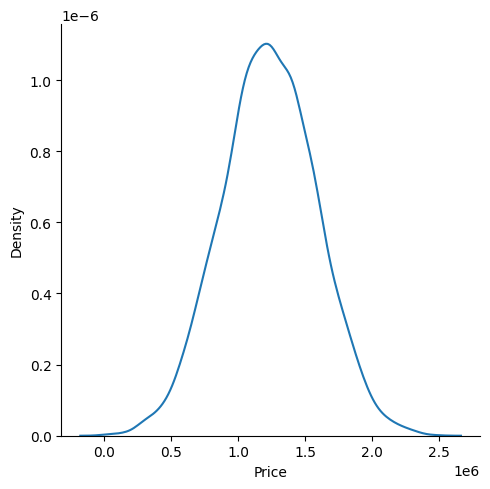

In [8]:
sns.displot(df.Price, kind="kde")

In [9]:
df.corr()

<ipython-input-9-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<ipython-input-10-72a6d2cbba77>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df.corr()*-1)
<ipython-input-10-72a6d2cbba77>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), mask=mask, annot=True)


<Axes: >

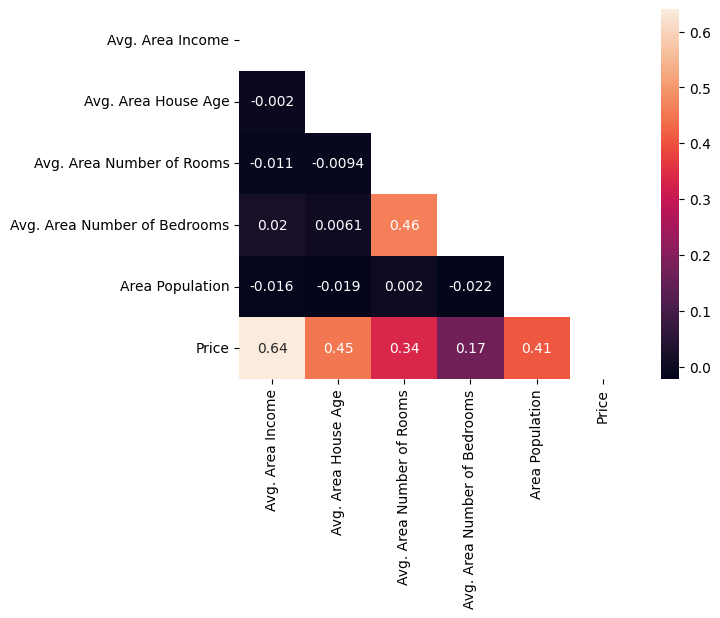

In [10]:
mask = np.zeros_like(df.corr()*-1)
mask[np.triu_indices_from(mask)] = True
#fig,ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), mask=mask, annot=True)

Ну а з теплової карти кореляцій, окрім раніше згаданого відношення ціна/середній дохід, к-ть кімнат/к-ть спалень можна також побачити відношення між ціною/віком району, ціною/населенням

<Axes: >

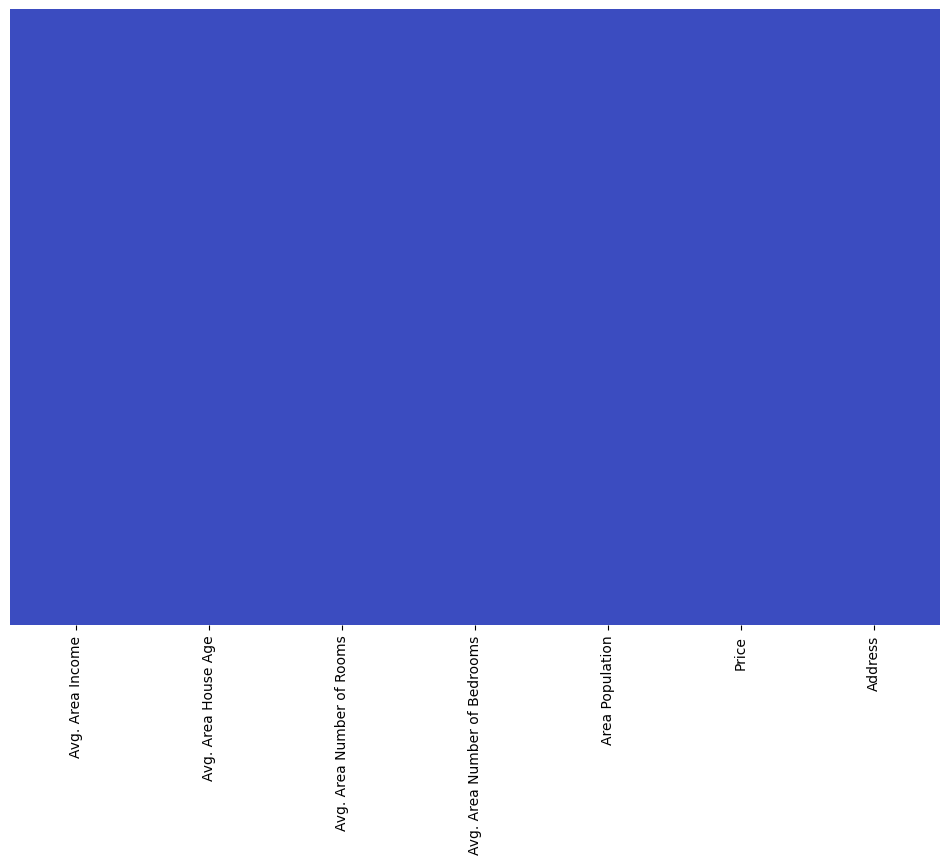

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

На відсутність нульових значень також вказував резубьтат виконання `df.info()`

In [12]:
df.drop('Address',axis=1,inplace=True)

## Створення моделі лінійної регресії

In [13]:
import statsmodels.formula.api as sf

model = sf.ols('Price ~ avgAreaIncome', df.rename(index=str, columns={"Avg. Area Income":"avgAreaIncome"}))
fitted_model = model.fit()
print(fitted_model.params)

Intercept       -221579.478206
avgAreaIncome        21.195483
dtype: float64


In [14]:
b0 = fitted_model.params[0]
b1 = fitted_model.params[1]
print("y = {} + {}*(avg. area income)".format(round(b0,3),round(b1,3)))

y = -221579.478 + 21.195*(avg. area income)


In [15]:
y = b0 + b1*100000
print("Прогнозована ціна ${}".format(round(y, 2)))

Прогнозована ціна $1897968.84


In [16]:
avg_area_income = pd.DataFrame({'avgAreaIncome': [100000]})
avg_area_income.head()
sales = fitted_model.predict(pd.DataFrame({'avgAreaIncome':[100000]}))
sales

0    1.897969e+06
dtype: float64

## Побудувати лінію тренду

In [17]:
avg_area_income = pd.DataFrame({'avgAreaIncome': [df['Avg. Area Income'].min(), df['Avg. Area Income'].max()]})
avg_area_income.head()

,avgAreaIncome
0,17796.631190
1,107701.748378


In [18]:
price_predictions = fitted_model.predict(avg_area_income)
price_predictions

0    1.556287e+05
1    2.061211e+06
dtype: float64

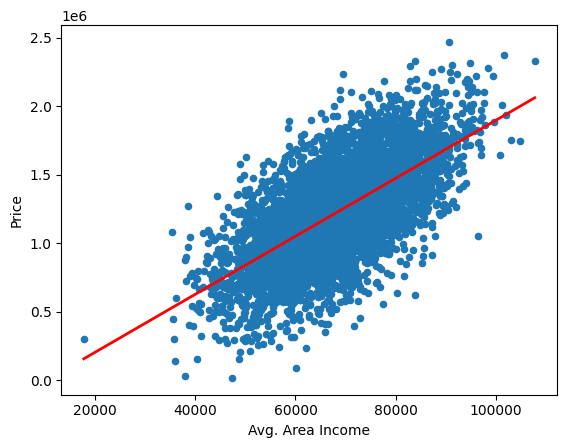

In [19]:
df.plot(kind='scatter', x='Avg. Area Income', y='Price')
plt.plot(avg_area_income, price_predictions, c='red', linewidth=2)

In [20]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     3463.
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        11:36:43   Log-Likelihood:                -69651.
No. Observations:                5000   AIC:                         1.393e+05
Df Residuals:                    4998   BIC:                         1.393e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.216e+05    2.5e+04     -8.863      0.000   -2.71e+05   -1.73e+05
avgAreaIncome    21.1955      0.360     58.844      0.000      20.489      21.902
==============================================================================
Omnibus:                        0.527   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.768   Jarque-Bera (JB):                0.572
Skew:                           0.007   Prob(JB):                        0.751
Kurtosis:                       2.950   Cond. No.                     4.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
fitted_model.rsquared

0.4092593070338846

In [22]:
## Множинна лінійна регресія. Створити модель з усіма змінними набору даних USA_housing.csv

In [23]:
tempDF = df.rename(index=str,columns={
  "Avg. Area Income": "avgAreaIncome",
  "Avg. Area House Age": "avgAreaHouseAge",
  "Avg. Area Number of Rooms" : "avgAreaNumOfRooms",
  "Avg. Area Number of Bedrooms": "avgAreaNumOfBedrooms",
  "Area Population": "areaPopulation"
})

In [24]:
multi_model = sf.ols(formula='Price ~ avgAreaIncome + avgAreaHouseAge + avgAreaNumOfRooms + avgAreaNumOfBedrooms', data=tempDF)
fitted_multi_model = multi_model.fit()
# print the coefficients
fitted_multi_model.params

Intercept              -2.057439e+06
avgAreaIncome           2.135808e+01
avgAreaHouseAge         1.628283e+05
avgAreaNumOfRooms       1.229039e+05
avgAreaNumOfBedrooms   -1.853639e+03
dtype: float64

In [25]:
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     3476.
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        11:36:43   Log-Likelihood:                -67640.
No. Observations:                5000   AIC:                         1.353e+05
Df Residuals:                    4995   BIC:                         1.353e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -2.057e+06   2.92e+04    -70.511      0.000   -2.11e+06      -2e+06
avgAreaIncome           21.3581      0.241     88.579      0.000      20.885      21.831
avgAreaHouseAge       1.628e+05   2591.095     62.842      0.000    1.58e+05    1.68e+05
avgAreaNumOfRooms     1.229e+05   2881.688     42.650      0.000    1.17e+05    1.29e+05
avgAreaNumOfBedrooms -1853.6388   2348.860     -0.789      0.430   -6458.435    2751.157
==============================================================================
Omnibus:                        0.962   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.618   Jarque-Bera (JB):                0.909
Skew:                           0.024   Prob(JB):                        0.635
Kurtosis:                       3.045   Cond. No.                     7.91e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Виходячи з результатів summary, змінна `avgAreaNumOfBedrooms` має досить великий показник `P>|t|`, що говорить про великий відсоток випадковості, тому краще виключити його з рівння. Усі змінні окрім `avgAreaNumOfBedrooms` (що не дуже логічно) позитивно пов'язані з ціною.

In [26]:
multi_model = sf.ols(formula='Price ~ avgAreaIncome + avgAreaHouseAge + avgAreaNumOfRooms', data=tempDF)
fitted_multi_model = multi_model.fit()
# print the coefficients
fitted_multi_model.params

Intercept           -2.056947e+06
avgAreaIncome        2.135273e+01
avgAreaHouseAge      1.628040e+05
avgAreaNumOfRooms    1.218507e+05
dtype: float64

## Завдання 3. Лінійна регресія у scikit-learn.

In [32]:
X = df.drop(['Avg. Area Number of Bedrooms', 'Price'],axis=1)
y = df.Price

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [34]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

print("Intercept: {}".format(lm.intercept_))
print("Coefficients: {}".format(lm.coef_))

Intercept: -2641562.1663704608
Coefficients: [2.16186171e+01 1.65268963e+05 1.22155472e+05 1.52203908e+01]


In [35]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.618617
Avg. Area House Age,165268.963373
Avg. Area Number of Rooms,122155.471708
Area Population,15.220391


In [37]:
lm.predict([[65000, 7, 7, 35000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1308332.66932435])

In [39]:
lm.score(X_test, y_test)

0.9184635249088302

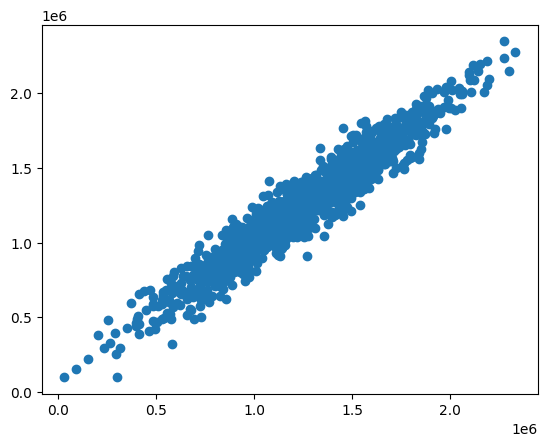

In [40]:
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)

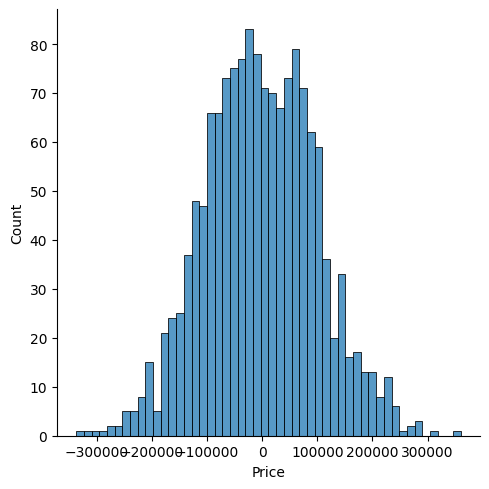

In [42]:
sns.displot((y_test-predictions),bins=50)

In [43]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 81268.89606138774
MSE: 10174437569.110653
RMSE: 100868.41710421877
